In [1]:
from cvxopt import matrix

In [3]:
a = matrix([1,2,3])

In [4]:
a+a

<3x1 matrix, tc='i'>

In [6]:
print 2*a

[ 2]
[ 4]
[ 6]



In [7]:
B = matrix([ [1.0, 2.0], [3.0, 4.0] ])

In [8]:
print B

[ 1.00e+00  3.00e+00]
[ 2.00e+00  4.00e+00]



In [9]:
from cvxopt import spmatrix

In [16]:
#The spmatrix() function creates a sparse matrix from a (value, row, column) triplet description.
D = spmatrix([1., 2.], [0, 1], [0, 1], (4,2))
print D
print matrix(D)

[ 1.00e+00     0    ]
[    0      2.00e+00]
[    0         0    ]
[    0         0    ]

[ 1.00e+00  0.00e+00]
[ 0.00e+00  2.00e+00]
[ 0.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00]



In [17]:
from cvxopt import sparse

In [20]:
E = sparse ([[B,B],[D]])
print E

[ 1.00e+00  3.00e+00  1.00e+00     0    ]
[ 2.00e+00  4.00e+00     0      2.00e+00]
[ 1.00e+00  3.00e+00     0         0    ]
[ 2.00e+00  4.00e+00     0         0    ]



In [23]:
from cvxopt import spdiag
print(spdiag([B,-B,-1,2]))

[ 1.00e+00  3.00e+00     0         0         0         0    ]
[ 2.00e+00  4.00e+00     0         0         0         0    ]
[    0         0     -1.00e+00 -3.00e+00     0         0    ]
[    0         0     -2.00e+00 -4.00e+00     0         0    ]
[    0         0         0         0     -1.00e+00     0    ]
[    0         0         0         0         0      2.00e+00]



In [28]:
from cvxopt import matrix
A = matrix(range(16),(4,4))
print A

[  0   4   8  12]
[  1   5   9  13]
[  2   6  10  14]
[  3   7  11  15]



In [32]:
print (A[[0,1,2,3],[0,2]])

[  0   8]
[  1   9]
[  2  10]
[  3  11]



In [33]:
print(A[1,:])

[  1   5   9  13]



In [35]:
print(A[::-1,::-1])

[ 15  11   7   3]
[ 14  10   6   2]
[ 13   9   5   1]
[ 12   8   4   0]



In [37]:
A[::5] = -1
print A

[ -1   4   8  12]
[  1  -1   9  13]
[  2   6  -1  14]
[  3   7  11  -1]



In [40]:
# First Chapter: now we are going to solve a Linear Programin system
from cvxopt import matrix, solvers
A = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
b = matrix([ 1.0, -2.0, 0.0, 4.0 ])
c = matrix([ 2.0, 1.0 ])
sol=solvers.lp(c,A,b)

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.


In [41]:
print(sol['x'])

[ 5.00e-01]
[ 1.50e+00]



In [42]:
#Second Chapter : Quadratic Objective Function
from cvxopt import matrix, solvers
Q = 2*matrix([ [2, .5], [.5, 1] ])
p = matrix([1.0, 1.0])
G = matrix([[-1.0,0.0],[0.0,-1.0]])
h = matrix([0.0,0.0])
A = matrix([1.0, 1.0], (1,2))
b = matrix(1.0)
sol=solvers.qp(Q, p, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  3e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  2e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  1e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  3e-16  5e-08
Optimal solution found.


In [44]:
print(sol['x'])

[ 2.50e-01]
[ 7.50e-01]



/home/crh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


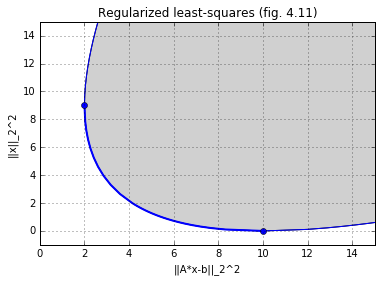

In [1]:
## 3. Least Square and Trade-Off function of LS
# Figure 4.11, page 185.
# Regularized least-squares.
%matplotlib inline
from pickle import load
from cvxopt import blas, lapack, matrix, solvers
solvers.options['show_progress'] = 0

data = load(open("rls.bin",'rb'))
A, b = data['A'], data['b']
m, n = A.size

# LS solution
xls = +b
lapack.gels(+A, xls)
xls = xls[:n]

# We compute the optimal values of
#
#     minimize/maximize  || A*x - b ||_2^2
#     subject to         x'*x = alpha
#
# via the duals.
#
# Lower bound:
#
#     maximize    -t - u*alpha
#     subject to  [u*I, 0; 0, t] + [A, b]'*[A, b] >= 0
#
# Upper bound:
#
#     minimize    t + u*alpha
#     subject to  [u*I, 0; 0, t] - [A, b]'*[A, b] >= 0.
#
# Two variables (t, u).

G = matrix(0.0, ((n+1)**2, 2))
G[-1, 0] = -1.0    # coefficient of t
G[: (n+1)**2-1 : n+2, 1] = -1.0    # coefficient of u
h = matrix( [ [ A.T * A,  b.T * A ], [ A.T * b, b.T * b ] ] )
c = matrix(1.0, (2,1))

nopts = 40
alpha1 = [2.0/(nopts//2-1) * alpha for alpha in range(nopts//2) ] + \
    [ 2.0 + (15.0 - 2.0)/(nopts//2) * alpha for alpha in
        range(1,nopts//2+1) ]
lbnds = [ blas.nrm2(b)**2 ]
for alpha in alpha1[1:]:
    c[1:] = alpha
    lbnds += [ -blas.dot(c, solvers.sdp(c, Gs=[G], hs=[h])['x']) ]

nopts = 10
alpha2 = [ 1.0/(nopts-1) * alpha for alpha in range(nopts) ]
ubnds = [ blas.nrm2(b)**2 ]
for alpha in alpha2[1:]:
    c[1:] = alpha
    ubnds += [ blas.dot(c, solvers.sdp(c, Gs=[G], hs=[-h])['x']) ]

try: import pylab
except ImportError: pass
else:
    pylab.figure(1, facecolor='w')
    pylab.plot(lbnds, alpha1, 'b-', ubnds, alpha2, 'b-')
    kmax = max([ k for k in range(len(alpha1)) if alpha1[k] <
        blas.nrm2(xls)**2 ])
    pylab.plot( [ blas.nrm2(b)**2 ] + lbnds[:kmax] +
        [ blas.nrm2(A*xls-b)**2 ], [0.0] + alpha1[:kmax] +
        [ blas.nrm2(xls)**2 ], '-', linewidth=2)
    pylab.plot([ blas.nrm2(b)**2, blas.nrm2(A*xls-b)**2 ],
        [0.0, blas.nrm2(xls)**2], 'bo')
    pylab.fill(lbnds[-1::-1] + ubnds + [ubnds[-1]],
        alpha1[-1::-1] + alpha2+ [alpha1[-1]], facecolor = '#D0D0D0')
    pylab.axis([0, 15, -1.0, 15])
    pylab.xlabel('||A*x-b||_2^2')
    pylab.ylabel('||x||_2^2')
    pylab.grid()
    pylab.title('Regularized least-squares (fig. 4.11)')
    pylab.show()

In [ ]:
#download the data and put it in the same folder you set this notbook to run from.


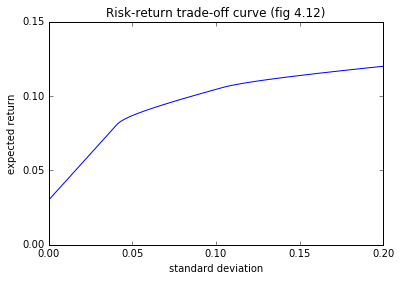

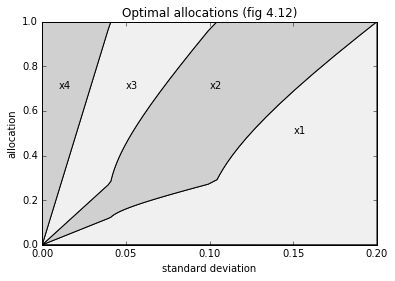

In [2]:
# Figure 4.12, page 187.
# Risk-return trade-off.

from math import sqrt
from cvxopt import matrix
from cvxopt.blas import dot
from cvxopt.solvers import qp, options

n = 4
S = matrix( [[ 4e-2,  6e-3, -4e-3,   0.0 ],
             [ 6e-3,  1e-2,  0.0,    0.0 ],
             [-4e-3,  0.0,   2.5e-3, 0.0 ],
             [ 0.0,   0.0,   0.0,    0.0 ]] )
pbar = matrix([.12, .10, .07, .03])

G = matrix(0.0, (n,n))
G[::n+1] = -1.0
h = matrix(0.0, (n,1))
A = matrix(1.0, (1,n))
b = matrix(1.0)

N = 100
mus = [ 10**(5.0*t/N-1.0) for t in range(N) ]
options['show_progress'] = False
xs = [ qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus ]
returns = [ dot(pbar,x) for x in xs ]
risks = [ sqrt(dot(x, S*x)) for x in xs ]

try: import pylab
except ImportError: pass
else:
    pylab.figure(1, facecolor='w')
    pylab.plot(risks, returns)
    pylab.xlabel('standard deviation')
    pylab.ylabel('expected return')
    pylab.axis([0, 0.2, 0, 0.15])
    pylab.title('Risk-return trade-off curve (fig 4.12)')
    pylab.yticks([0.00, 0.05, 0.10, 0.15])

    pylab.figure(2, facecolor='w')
    c1 = [ x[0] for x in xs ]
    c2 = [ x[0] + x[1] for x in xs ]
    c3 = [ x[0] + x[1] + x[2] for x in xs ]
    c4 = [ x[0] + x[1] + x[2] + x[3] for x in xs ]
    pylab.fill(risks + [.20], c1 + [0.0], facecolor = '#F0F0F0')
    pylab.fill(risks[-1::-1] + risks, c2[-1::-1] + c1,
        facecolor = '#D0D0D0')
    pylab.fill(risks[-1::-1] + risks, c3[-1::-1] + c2,
        facecolor = '#F0F0F0')
    pylab.fill(risks[-1::-1] + risks, c4[-1::-1] + c3,
        facecolor = '#D0D0D0')
    pylab.axis([0.0, 0.2, 0.0, 1.0])
    pylab.xlabel('standard deviation')
    pylab.ylabel('allocation')
    pylab.text(.15,.5,'x1')
    pylab.text(.10,.7,'x2')
    pylab.text(.05,.7,'x3')
    pylab.text(.01,.7,'x4')
    pylab.title('Optimal allocations (fig 4.12)')
    pylab.show()

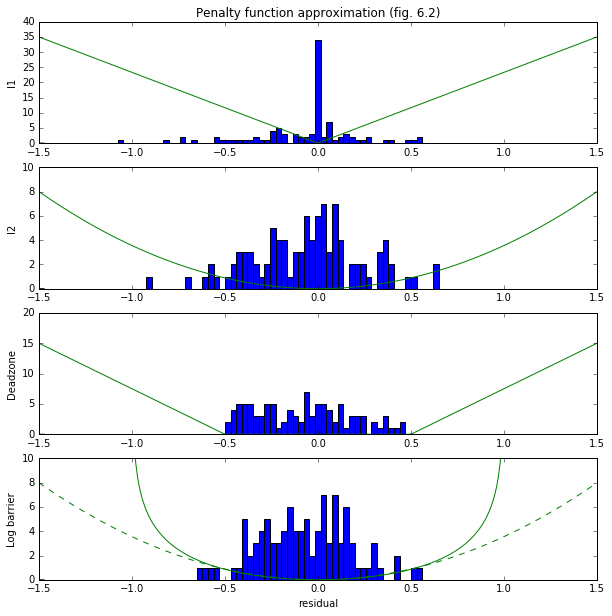

In [3]:
# Figure 6.2, page 297.
# Penalty approximation.
#
# The problem data are not the same as in the book figure.

from cvxopt import lapack, solvers, matrix, spdiag, log, div, normal
from cvxopt.modeling import variable, op, max, sum
solvers.options['show_progress'] = 0
try: import numpy, pylab
except ImportError: pylab_installed = False
else: pylab_installed = True

m, n = 100, 30
A = normal(m,n)
b = normal(m,1)
b /= (1.1 * max(abs(b)))   # Make x = 0 feasible for log barrier.


# l1 approximation
#
# minimize || A*x + b ||_1

x = variable(n)
op(sum(abs(A*x+b))).solve()
x1 = x.value

if pylab_installed:
    pylab.figure(1, facecolor='w', figsize=(10,10))
    pylab.subplot(411)
    nbins = 100
    bins = [-1.5 + 3.0/(nbins-1)*k for k in range(nbins)]
    pylab.hist( A*x1+b , numpy.array(bins))
    nopts = 200
    xs = -1.5 + 3.0/(nopts-1) * matrix(list(range(nopts)))
    pylab.plot(xs, (35.0/1.5) * abs(xs), 'g-')
    pylab.axis([-1.5, 1.5, 0, 40])
    pylab.ylabel('l1')
    pylab.title('Penalty function approximation (fig. 6.2)')



# l2 approximation
#
# minimize || A*x + b ||_2

x = matrix(0.0, (m,1))
lapack.gels(+A, x)
x2 = x[:n]

if pylab_installed:
    pylab.subplot(412)
    pylab.hist(A*x2+b, numpy.array(bins))
    pylab.plot(xs, (8.0/1.5**2) * xs**2 , 'g-')
    pylab.ylabel('l2')
    pylab.axis([-1.5, 1.5, 0, 10])


# Deadzone approximation
#
# minimize sum(max(abs(A*x+b)-0.5, 0.0))

x = variable(n)
op(sum(max(abs(A*x+b)-0.5, 0.0))).solve()
xdz = x.value

if pylab_installed:
    pylab.subplot(413)
    pylab.hist(A*xdz+b, numpy.array(bins))
    pylab.plot(xs, 15.0/1.0 * matrix([ max(abs(xk)-0.5, 0.0) for xk
        in xs ]), 'g-')
    pylab.ylabel('Deadzone')
    pylab.axis([-1.5, 1.5, 0, 20])


# Log barrier
#
# minimize -sum (log ( 1.0 - A*x+b)**2)

def F(x=None, z=None):
    if x is None: return 0, matrix(0.0, (n,1))
    y = A*x+b
    if max(abs(y)) >= 1.0: return None
    f = -sum(log(1.0 - y**2))
    gradf = 2.0 * A.T * div(y, 1-y**2)
    if z is None: return f, gradf.T
    H = A.T * spdiag(2.0 * z[0] * div( 1.0+y**2, (1.0 - y**2)**2 )) * A
    return f, gradf.T, H
xlb = solvers.cp(F)['x']

if pylab_installed:
    pylab.subplot(414)
    pylab.hist(A*xlb+b, numpy.array(bins))
    nopts = 200
    pylab.plot(xs, (8.0/1.5**2) * xs**2, 'g--')
    xs2 = -0.99999 + (2*0.99999 /(nopts-1)) * matrix(list(range(nopts)))
    pylab.plot(xs2, -3.0 * log(1.0 - abs(xs2)**2), 'g-')
    pylab.ylabel('Log barrier')
    pylab.xlabel('residual')
    pylab.axis([-1.5, 1.5, 0, 10])
    pylab.show()


In [ ]:
#for which one is better refer to book by 

In [52]:
#Robust Regression ...
# Figure 6.5, page 300.
# Robust regression.

from cvxopt import solvers, lapack, matrix, spmatrix
from pickle import load
solvers.options['show_progress'] = 0

data = load(open('huber.bin','rb'))
u, v = data['u'], data['v']
m, n = len(u), 2

A = matrix( [m*[1.0], [u]] )
b = +v

# Least squares solution.
xls = +b
lapack.gels(+A, xls)
xls = xls[:2]


# Robust least squares.
#
# minimize  sum( h( A*x-b ))
#
# where h(u) = u^2           if |u| <= 1.0
#            = 2*(|u| - 1.0) if |u| > 1.0.
#
# Solve as a QP (see exercise 4.5):
#
# minimize    (1/2) * u'*u + 1'*v
# subject to  -u - v <= A*x-b <= u + v
#             0 <= u <= 1
#             v >= 0
#
# Variables  x (n), u (m), v(m)

novars = n+2*m
P = spmatrix([],[],[], (novars, novars))
P[n:n+m,n:n+m] = spmatrix(1.0, range(m), range(m))
q = matrix(0.0, (novars,1))
q[-m:] = 1.0

G = spmatrix([], [], [], (5*m, novars))
h = matrix(0.0, (5*m,1))

# A*x - b <= u+v
G[:m,:n] = A
G[:m,n:n+m] = spmatrix(-1.0, range(m), range(m))
G[:m,n+m:] = spmatrix(-1.0, range(m), range(m))
h[:m] = b

# -u - v <= A*x - b
G[m:2*m,:n] = -A
G[m:2*m,n:n+m] = spmatrix(-1.0, range(m), range(m))
G[m:2*m,n+m:] = spmatrix(-1.0, range(m), range(m))
h[m:2*m] = -b

# u >= 0
G[2*m:3*m,n:n+m] = spmatrix(-1.0, range(m), range(m))

# u <= 1
G[3*m:4*m,n:n+m] = spmatrix(1.0, range(m), range(m))
h[3*m:4*m] = 1.0

# v >= 0
G[4*m:,n+m:] = spmatrix(-1.0, range(m), range(m))

xh = solvers.qp(P, q, G, h)['x'][:n]

try: import pylab
except ImportError: pass
else:
    pylab.figure(1,facecolor='w')
    pylab.plot(u, v,'o',
        [-11,11], [xh[0]-11*xh[1], xh[0]+11*xh[1]], '-g',
        [-11,11], [xls[0]-11*xls[1], xls[0]+11*xls[1]], '--r',
        markerfacecolor='w', markeredgecolor='b')
    pylab.axis([-11, 11, -20, 25])
    pylab.xlabel('t')
    pylab.ylabel('f(t)')
    pylab.title('Robust regression (fig. 6.5)')
    pylab.show()



In [ ]:
#Input Design is skipped....
#Sparse Regressor is skipped too.
# signal smoothing is skipped as well
# total variation reconstruction

# Figures 6.15 and 6.16, pages 320 and 325.
# Stochastic and worst-case robust approximation.

# Polynomial and spline fitting.

# Figures 6.25 and 6.26, page 342.
# Consumer preference analysis.


# Figures 7.1, page 355.
# Logistic regression.

# Figures 7.2 and 7.3, pages 363 and 364.
# Maximum entropy distribution.


# Figures 7.6 and 7.7, page 383.
# Chebyshev bounds.


In [53]:
% data generation
T = 10; 

G = ones(T+1);
G = tril(G) - diag(diag(G)); 
G = G(:,1:end-1); 
H = G; 
x_0 = 0;
x0 = x_0*ones(T+1,1); 

s = 8;
h = 1;
b = 4;
g = 4;

mu = 3*rand(T,1)-1.5; 
tmp = randn(T)/4;
Sigma = tmp*tmp';


% Case I: optimal affine controller
% ---------------------------------
% number of sample paths for w 
% M = 5000; % used in paper; takes many minutes to run!
M = 500;
W = -exp(mu*ones(1,M) + sqrtm(Sigma)*randn(T,M));
I = eye(T+1); 
cvx_begin
    variable Q(T,T+1) 
    variable r(T) 
       
    Pxw = (I+H*Q)*G;
    Puw = Q*G;
    x_tilde = (I + H*Q)*x0 + H*r;
    u_tilde = Q*x0 + r;
    
    x = Pxw*W + x_tilde*ones(1,M);
    u = Puw*W + u_tilde*ones(1,M);
    minimize(sum(sum(max(h*x(1:end-1,:),-b*x(1:end-1,:))) + max(g*x(end,:),-b*x(end,:)) + sum(abs(s*u))))
    Qupper = [Q;zeros(1,T+1)];
    Qupper = triu(Qupper) - diag(diag(Qupper));
    Qupper == 0
cvx_end

I = eye(T);
F = (I+Q*H)\Q;
u0 = (I+Q*H)\r;

% testing the control laws obtained on new instances
%M = 5000; % used in paper
M = 200;
W = -exp(mu*ones(1,M) + sqrtm(Sigma)*randn(T,M));
% Case I: affine controller
x = Pxw*W + x_tilde*ones(1,M);
u = Puw*W + u_tilde*ones(1,M);
cost_affine = (sum(max(h*x(1:end-1,:),-b*x(1:end-1,:))) + max(g*x(end,:),-b*x(end,:)) + sum(abs(s*u)));

% Case II: naive greedy controller
% --------------------------------
cost_naive = zeros(1,M);
d_mean = exp(mu+.5*diag(Sigma));
for iter =1:M
    % simple controller  
    xn = [0; d_mean + W(:,iter)]; 
    un = d_mean - xn(1:end-1);
    cost_naive(iter) = sum(max(h*xn(1:end-1),-b*xn(1:end-1))) + max(g*xn(end),-b*xn(end)) + sum(abs(s*un));
end

% Case III: greedy controller
% ---------------------------
cost_greedy = zeros(1, M);
for iter =1:M
    % simple controller 
    % d_bar(t) is the expected value of d(t) given d(0),...,d(t-1)
    d_bar = zeros(T, 1); 
    d_bar(1) = exp(mu(1) + 0.5*Sigma(1,1));
    for t=2:T 
        v = mu(t) + Sigma(t,1:t-1)*(Sigma(1:t-1,1:t-1)\(log(-W(1:t-1,iter)) - mu(1:t-1)));
        V = Sigma(t,t) - Sigma(t,1:t-1)*(Sigma(1:t-1,1:t-1)\Sigma(1:t-1,t));
        d_bar(t) = exp(v+0.5*V);
    end    
    xs = [0; d_bar + W(:,iter)]; 
    us = d_bar - xs(1:end-1);
    cost_greedy(iter) = sum(max(h*xs(1:end-1),-b*xs(1:end-1))) + max(g*xs(end),-b*xs(end)) + sum(abs(s*us));
end

% Case IV: CE-MPC
% ---------------
cvx_quiet(true);
cost_mpc_ce = zeros(1,M); 
for iter = 1:M
    % at each t, replace future d-trajectory with mean of cond. distr.
    xce = zeros(T+1,1); 
    xce(1) = x_0;
    uce = zeros(T,1);
    for t=1:T 
        disp(['CE-MPC *** iter = ' num2str(iter) ' t = ' num2str(t)]); 
        if t>1 
            v = mu(t:T) + Sigma(t:T,1:t-1)*(Sigma(1:t-1,1:t-1)\(log(-W(1:t-1,iter)) - mu(1:t-1)));
            V = Sigma(t:T,t:T) - Sigma(t:T,1:t-1)*(Sigma(1:t-1,1:t-1)\Sigma(1:t-1,t:T));
        else 
            v = mu;
            V = Sigma;
        end
        d_bar = exp(v + 0.5*diag(V));       % mean of conditional distr.
        cvx_begin 
            variable u(T-t+1) 
            G = ones(T-t+2);
            G = tril(G) - diag(diag(G)); 
            G = G(:,1:end-1); 
            H = G; 
            xinit = xce(t)*ones(T-t+2,1); 
            x = -G*d_bar + H*u + xinit; 
            minimize sum(max(h*x(1:end-1),-b*x(1:end-1))) + max(g*x(end),-b*x(end)) + sum(abs(s*u))
        cvx_end 
        if isempty(strfind(cvx_status, 'Solved')) 
            break
        end
        uce(t) = u(1);
        xce(t+1) = xce(t) + uce(t) + W(t,iter);
    end  
    if isempty(strfind(cvx_status, 'Solved')) 
        cost_mpc_ce(iter) = NaN;
    else 
        cost_mpc_ce(iter) = sum(max(h*xce(1:end-1),-b*xce(1:end-1))) + max(g*xce(end),-b*xce(end)) + sum(abs(s*uce));
    end
end 

% Case V: Compute prescient lower bound 
% -------------------------------------
G = ones(T+1);
G = tril(G) - diag(diag(G)); 
G = G(:,1:end-1); 
H = G; 
cost_lb = zeros(1,M); 
for iter = 1:M
    disp(['Lower Bound *** iter = ' num2str(iter) ' t = ' num2str(t)]); 
    cvx_begin
        variable ulb(T) 
        xlb = G*W(:,iter) + H*ulb;
        minimize sum(max(h*xlb(1:end-1),-b*xlb(1:end-1))) + max(g*xlb(end),-b*xlb(end)) + sum(abs(s*ulb))
    cvx_end
    if isempty(strfind(cvx_status, 'Solved')) 
        cost_lb(iter) = NaN;
    else 
        cost_lb(iter) = sum(max(h*xlb(1:end-1),-b*xlb(1:end-1))) + max(g*xlb(end),-b*xlb(end)) + sum(abs(s*ulb));
    end
end

% Results
% -------
disp(['naive: mean ' num2str(mean(cost_naive)) ', std ' num2str(std(cost_naive))]);
disp(['greedy: mean ' num2str(mean(cost_greedy)) ', std ' num2str(std(cost_greedy))]);
disp(['CE-MPC: mean ' num2str(mean(cost_mpc_ce)) ', std ' num2str(std(cost_mpc_ce))]);
disp(['affine: mean ' num2str(mean(cost_affine)) ', std '  num2str(std(cost_affine))]);
disp(['lwrbnd: mean ' num2str(mean(cost_lb)) ', std '  num2str(std(cost_lb))]);

SyntaxError: invalid syntax (<ipython-input-53-d1c33e3da3e8>, line 6)